# Introducing TextBlob and Vader Sentiment Analysis on the data

In [7]:
#import all the needed libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [8]:
#import csv file of the translated_dataset. NOTE: This dataset has an extra column which has the translated files
r_df = pd.read_csv('ecomm_data/olist_order_reviews_translated_dataset - olist_order_reviews_dataset.csv')
r_df.head(20)

,7,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Translations
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/1/2018 0:00,18/1/2018 21:46,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/3/2018 0:00,11/3/2018 3:05,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/2/2018 0:00,18/2/2018 14:36,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,21/4/2017 0:00,21/4/2017 22:02,I received well before the deadline.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,1/3/2018 0:00,2/3/2018 10:26,Congratulations lannister loved stores buy the...
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,13/4/2018 0:00,16/4/2018 0:39,NaN
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,16/7/2017 0:00,18/7/2017 19:30,NaN
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,14/8/2018 0:00,14/8/2018 21:36,NaN
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,17/5/2017 0:00,18/5/2017 12:05,NaN
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,22/5/2018 0:00,23/5/2018 16:45,efficient device. site in the set to this prin...


# Data Cleaning

In [9]:
#Remove all rows with NaN
r_df = r_df[r_df.review_comment_message.notnull()]
r_df = r_df[r_df.Translations.notnull()]

# Import the sentiment analyzers API : TextBlob and Vader Sentiment

In [10]:
#--------------------------------------------------------------------------------------------
#import textBlob Module
from textblob import TextBlob


def get_polarity(text):            #returns float containing polarity of the text between -1 to +1.
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):        #returns the subjectivity of the sentence 0 to +1
    return TextBlob(text).sentiment.subjectivity

#----------------------------------------------------------------------------------------------

#import  sentiment module
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#----------------------------------------------------------------------------------------------
#example
sentence = "The movie was awesome!"

# Sentiment from the Vader API
vs = analyzer.polarity_scores(sentence)
print("The vader sentiment analyser sentiment is : ", vs['compound'])

# Sentiment from the TextBlob API
print("The TextBlob sentiment analyser sentiment is : ", get_polarity(sentence))

# Subjectivity from the TextBlob API
print("The subjectivity of the text is ", get_subjectivity(sentence))


#---------------------------------------------------------------------------------------------

The vader sentiment analyser sentiment is :  0.6588
The TextBlob sentiment analyser sentiment is :  1.0
The subjectivity of the text is  1.0


### Example of passing a positive comment on textBlob

In [11]:
sentence = "Absolutely beautiful! I wear it everyday and get compliments all the time. It's such a great accessory"
analysis = TextBlob(sentence).sentiment.polarity
print("\tThe sentiment value is : ",analysis)

	The sentiment value is :  0.4


In [12]:
analyzer = SentimentIntensityAnalyzer()
sentence = "I regret buying this bracelet. It was broken and nothing like how the website showed it"
vs = analyzer.polarity_scores(sentence)
print("\tThe sentiment value is : ",vs['compound'])

	The sentiment value is :  -0.7912


# Applying the APIs on the dataset and obtaining the sentiment and subjectivity values.

In [13]:

#Dictionary of positivity, negativity, neutrality of the sentences
r_df['Vader_scores'] = r_df['Translations'].apply(lambda Description: analyzer.polarity_scores(Description))

#Sentiment Polarity from Vader
r_df['Vader_Compound'] = r_df['Vader_scores'].apply(lambda score_dict: score_dict['compound'])
#Sentiment Polarity from TextBlob
r_df['TextBlob_Polarity'] = r_df['Translations'].apply(get_polarity)

#Sentiment Subjecitiy from TextBlob
r_df['Subjectivity_TextBlob'] = r_df['Translations'].apply(get_subjectivity)

In [14]:
r_df.describe()

,review_score,Vader_Compound,TextBlob_Polarity,Subjectivity_TextBlob
count,41726.000000,41726.000000,41726.000000,41726.000000
mean,3.639817,0.262354,0.272408,0.485005
std,1.626590,0.429925,0.398018,0.349447
min,1.000000,-0.972700,-1.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.340000,0.166667,0.557143
75%,5.000000,0.612775,0.600000,0.767857
max,5.000000,0.994300,1.000000,1.000000


In [15]:
# Data series for the univariate statistics
TextBlob_Polarity = pd.DataFrame(r_df['TextBlob_Polarity'])
Vader_Compound = pd.DataFrame(r_df['Vader_Compound'])
Subjectivity_TextBlob = pd.DataFrame(r_df['Subjectivity_TextBlob'])

jointDF = pd.concat([TextBlob_Polarity, Vader_Compound], axis = 1)
jointDF

,TextBlob_Polarity,Vader_Compound
3,0.000000,0.2732
4,0.666667,0.9601
9,0.000000,0.4215
12,0.700000,0.7876
15,0.500000,0.6486
...,...,...
99983,0.906250,0.7955
99990,0.500000,-0.4874
99996,0.437500,0.9402
99998,-0.220238,-0.6941


# Univariate Statistics on the TextBlob_Polarity and Vader_Compound

In [16]:
r_df.describe()

,review_score,Vader_Compound,TextBlob_Polarity,Subjectivity_TextBlob
count,41726.000000,41726.000000,41726.000000,41726.000000
mean,3.639817,0.262354,0.272408,0.485005
std,1.626590,0.429925,0.398018,0.349447
min,1.000000,-0.972700,-1.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.340000,0.166667,0.557143
75%,5.000000,0.612775,0.600000,0.767857
max,5.000000,0.994300,1.000000,1.000000


<AxesSubplot:>

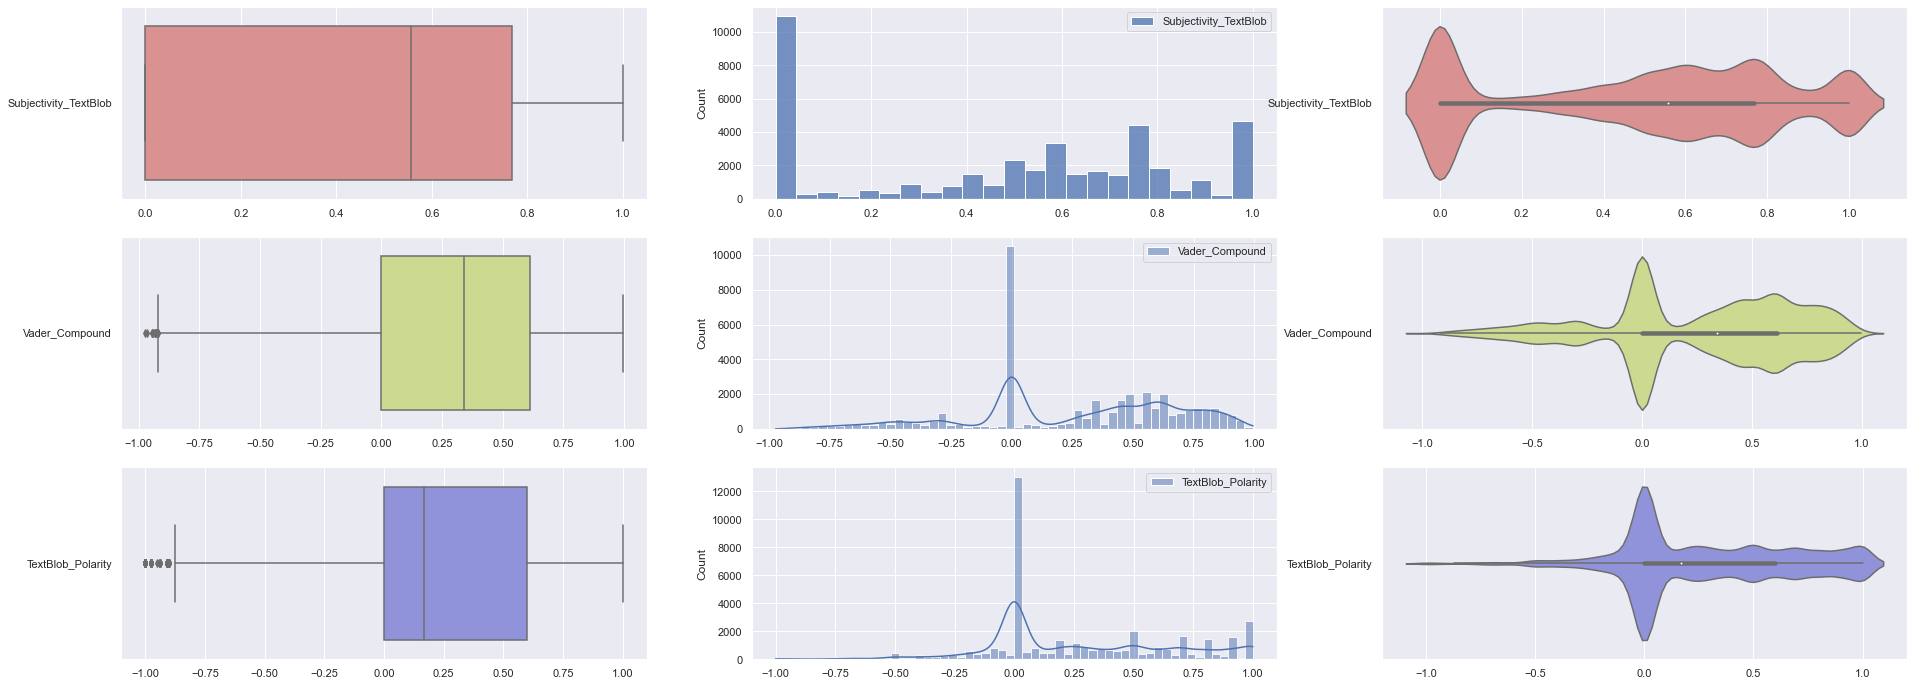

In [17]:

f, axes = plt.subplots(3, 3, figsize=(32, 12))

#Plot the basic uni-variate figures for HP
sb.boxplot(data = Subjectivity_TextBlob, orient = "h", ax = axes[0,0], color = "#e68585")
sb.histplot(data = Subjectivity_TextBlob, ax = axes[0,1], color = "#e68585")
sb.violinplot(data = Subjectivity_TextBlob, orient = "h", ax = axes[0,2], color = "#e68585")

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = Vader_Compound, orient = "h", ax = axes[1,0], color = "#d3e685")
sb.histplot(data = Vader_Compound, ax = axes[1,1], kde = True, color = "#d3e685")
sb.violinplot(data = Vader_Compound, orient = "h", ax = axes[1,2], color = "#d3e685")

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = TextBlob_Polarity, orient = "h", ax = axes[2,0], color = "#8588e6")
sb.histplot(data = TextBlob_Polarity, ax = axes[2,1], kde = True, color = "#8588e6")
sb.violinplot(data = TextBlob_Polarity, orient = "h", ax = axes[2,2], color = "#8588e6")

# Removing all the objective comments

In [36]:
Combine_df = pd.DataFrame(r_df[['TextBlob_Polarity', 'Subjectivity_TextBlob', 'Vader_Compound', 'review_score']])
for x in Combine_df.index:
  if Combine_df.loc[x, "Subjectivity_TextBlob"]==0:
    Combine_df.drop(x, inplace = True)

TextBlob_Polarity = pd.DataFrame(Combine_df['TextBlob_Polarity'])
Vader_Compound = pd.DataFrame(Combine_df['Vader_Compound'])
review_score = pd.DataFrame(Combine_df['review_score'])
Subjectivity_TextBlob = pd.DataFrame(Combine_df['Subjectivity_TextBlob'])   



<AxesSubplot:>

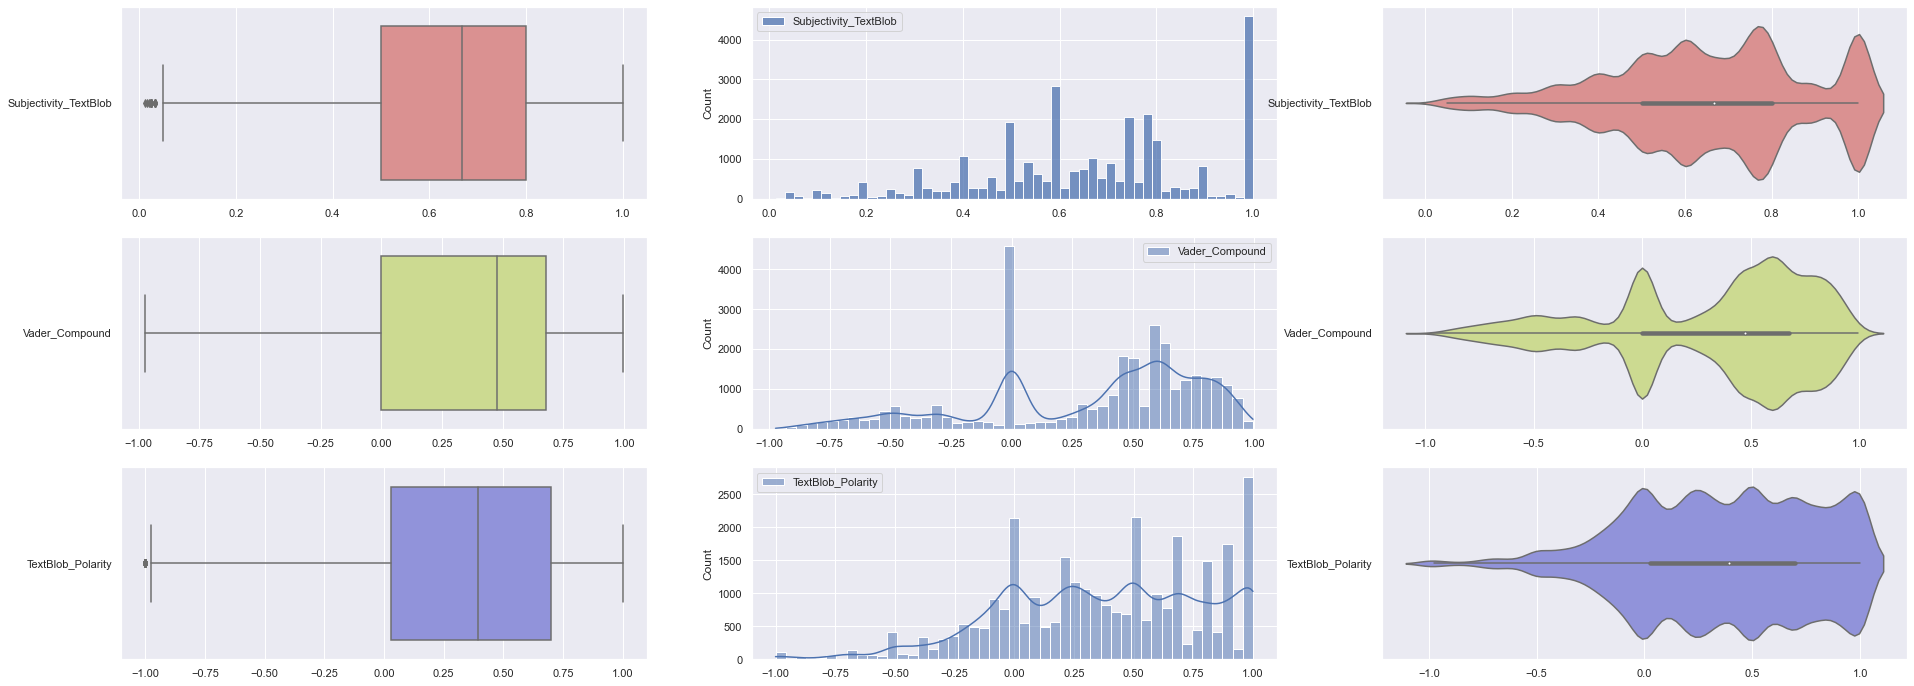

In [37]:

f, axes = plt.subplots(3, 3, figsize=(32, 12))

#Plot the basic uni-variate figures for HP
sb.boxplot(data = Subjectivity_TextBlob, orient = "h", ax = axes[0,0], color = "#e68585")
sb.histplot(data = Subjectivity_TextBlob, ax = axes[0,1], color = "#e68585")
sb.violinplot(data = Subjectivity_TextBlob, orient = "h", ax = axes[0,2], color = "#e68585")

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = Vader_Compound, orient = "h", ax = axes[1,0], color = "#d3e685")
sb.histplot(data = Vader_Compound, ax = axes[1,1], kde = True, color = "#d3e685")
sb.violinplot(data = Vader_Compound, orient = "h", ax = axes[1,2], color = "#d3e685")

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = TextBlob_Polarity, orient = "h", ax = axes[2,0], color = "#8588e6")
sb.histplot(data = TextBlob_Polarity, ax = axes[2,1], kde = True, color = "#8588e6")
sb.violinplot(data = TextBlob_Polarity, orient = "h", ax = axes[2,2], color = "#8588e6")

# Evaluating the difference between TextBlob and Vader Sentiment modules

In [38]:
jointDF = pd.concat([TextBlob_Polarity, Vader_Compound], axis = 1)
jointDF

,TextBlob_Polarity,Vader_Compound
4,0.666667,0.9601
9,0.000000,0.4215
12,0.700000,0.7876
15,0.500000,0.6486
19,-1.000000,-0.4767
...,...,...
99978,-0.083333,-0.4019
99983,0.906250,0.7955
99990,0.500000,-0.4874
99996,0.437500,0.9402


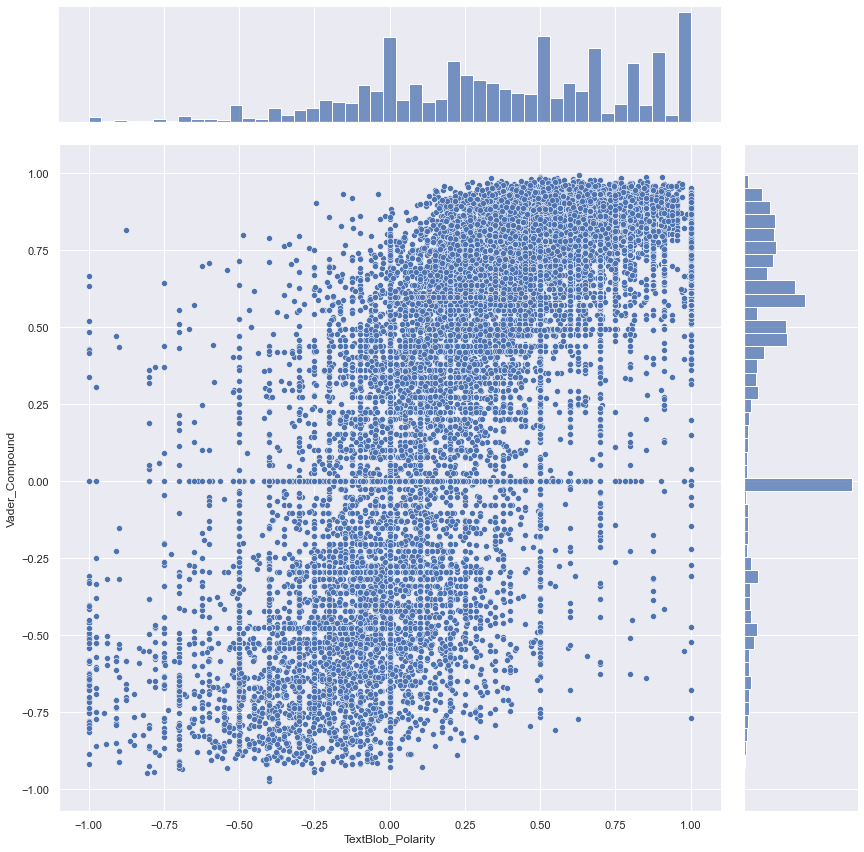

In [39]:
sb.jointplot(data = jointDF, x = "TextBlob_Polarity", y = "Vader_Compound", height = 12)

<AxesSubplot:>

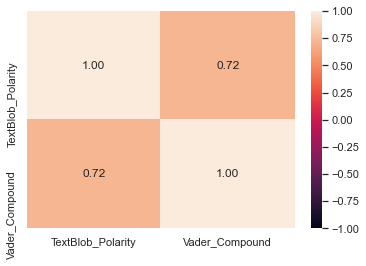

In [40]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# Evaluating the relationship between Vader Compound and Review Score

In [41]:
jointDF = pd.concat([review_score, Vader_Compound], axis = 1)
jointDF

,review_score,Vader_Compound
4,5,0.9601
9,4,0.4215
12,4,0.7876
15,5,0.6486
19,1,-0.4767
...,...,...
99978,2,-0.4019
99983,5,0.7955
99990,3,-0.4874
99996,5,0.9402


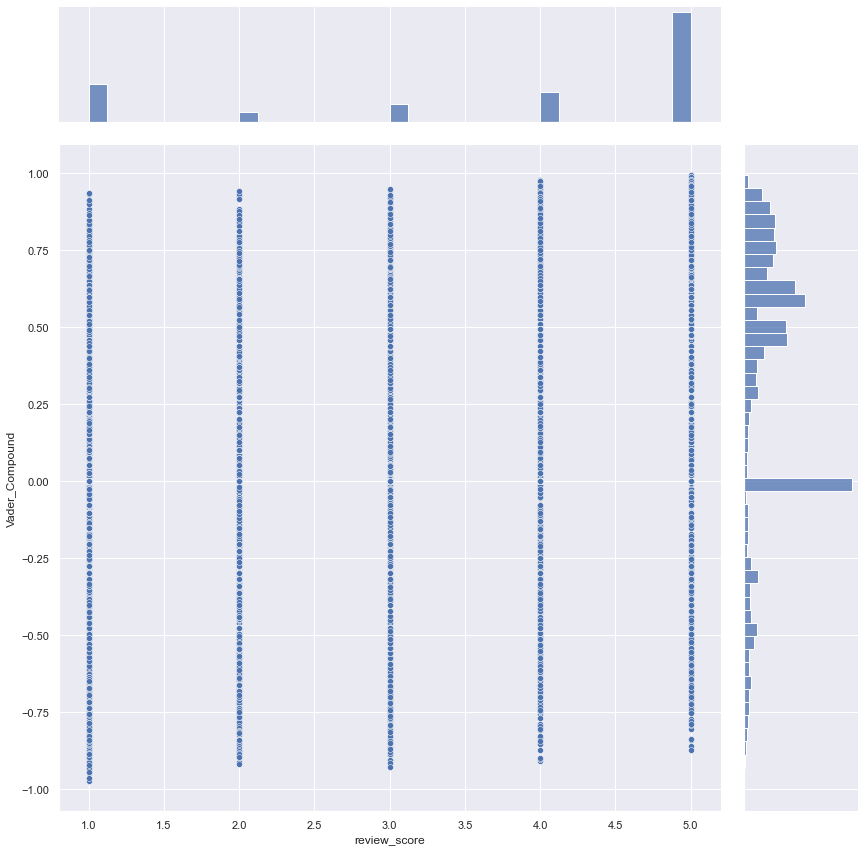

In [42]:
sb.jointplot(data = jointDF, x = "review_score", y = "Vader_Compound", height = 12)

<AxesSubplot:>

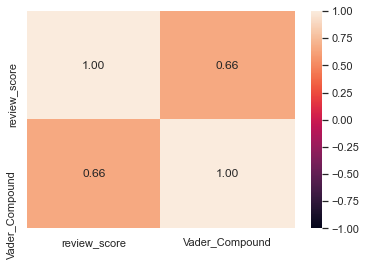

In [43]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# Evaluating the relationship between Review Score and TextBlob Polarity

In [44]:
jointDF = pd.concat([review_score, TextBlob_Polarity], axis = 1)
jointDF

,review_score,TextBlob_Polarity
4,5,0.666667
9,4,0.000000
12,4,0.700000
15,5,0.500000
19,1,-1.000000
...,...,...
99978,2,-0.083333
99983,5,0.906250
99990,3,0.500000
99996,5,0.437500


<AxesSubplot:>

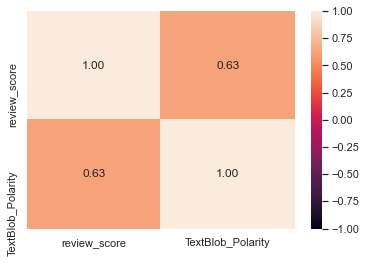

In [45]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

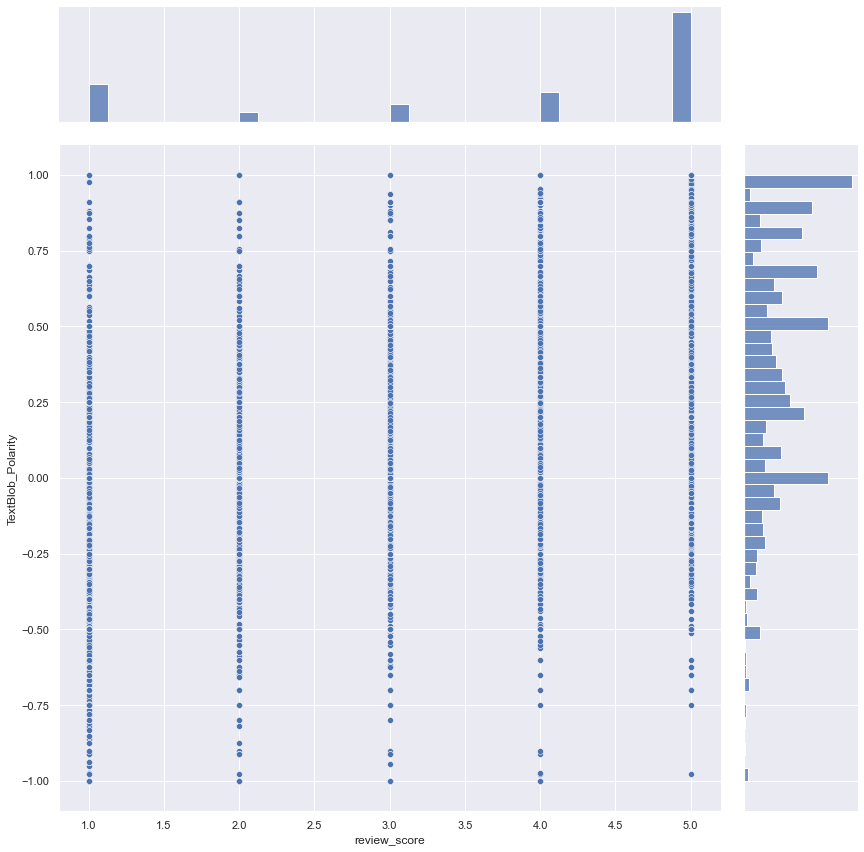

In [46]:
sb.jointplot(data = jointDF, x = "review_score", y = "TextBlob_Polarity", height = 12)

# Lateness of a delivery

Customer reviews are not always addressed towards the quality of the product but a lot of time regarding the delivery of the product. A lot of customers face problems such as late delivery, failed delivery, broken products. Transportation and delivery of the product affects the sentiments of the customers. Sellers don't have anything to do with this. Threrefore, it is unfair for sellers to be demoted in our model because of bad delivery. Hence, we sought out to find below the correlation between the quality of delivery and the sentiment in the customer reviews

### Classifying a product as late
We have information about the promised delivery date and the actual delivery date in the "olist_orders_dataset". By finding out the difference between these dates, we can find out if the delivery is "early" / "late" / "on-time"

In [47]:
orders = pd.read_csv('ecomm_data/olist_orders_dataset.csv')
print(orders.shape)
orders.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [48]:
orders = orders[orders.order_delivered_customer_date.notnull()]
orders = orders[orders.order_estimated_delivery_date.notnull()]
orders = orders.merge(r_df, on = "order_id")
print(orders.shape)

(39728, 19)


In [49]:
def stringSplitter(y):
    year = int(y[0:4])
    month = int(y[5:7])
    date = int(y[8:10])
    return year, month, date

e_date = {}
e_month = {}
e_year = {}

a_date = {}
a_month = {}
a_year = {}



timing = {}



# Traverse through the datasets and record values for the timing dataset.

for i in orders.index:
    date1 = stringSplitter(orders['order_estimated_delivery_date'][i])
    e_year.update({ i : date1[0]})
    e_month.update({i :  date1[1]})
    e_date.update({i : date1[2]})
    
    date2 = stringSplitter(orders['order_delivered_customer_date'][i])
    a_year.update({ i : date2[0]})
    a_month.update({i :  date2[1]})
    a_date.update({i : date2[2]})
    
    if(date2[0]>date1[0]):
        timing.update({i : "Late"})
    elif(date2[0]<date1[0]):
        timing.update({i : "Early"})
    else:
        if(date2[1]>date1[1]):
            timing.update({i : "Late"})
        elif(date2[1]<date1[1]):
            timing.update({i : "Early"})
        else:
            if(date2[2]>date1[2]):
                timing.update({i : "Late"})
            elif(date2[2]<date1[2]):
                timing.update({i : "Early"})
            else:
                timing.update({i : "On-time"})
        
   
eVa_df = pd.DataFrame(orders[["order_id", "customer_id", "order_status", "order_delivered_customer_date", "order_estimated_delivery_date"]])    
eVa_df.head()

e_date = pd.Series(e_date)
e_month = pd.Series(e_month)
e_year = pd.Series(e_year)
a_date = pd.Series(a_date)
a_month = pd.Series(a_month)
a_year = pd.Series(a_year)
timing = pd.Series(timing)
data = pd.DataFrame({"expected_date" : e_date, "expected_month" : e_month, "expected_year" : e_year,  "actual_date" : a_date, "actual_month" : a_month, "actual_year" : a_year, "timing" : timing})
orders['timing'] = timing

Early      35287
Late        3927
On-time      514
Name: timing, dtype: int64


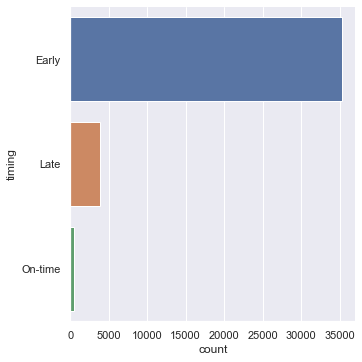

In [50]:
print(orders['timing'].value_counts())
sb.catplot(y = "timing", data = orders, kind = "count")